In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [5]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
df.shape

(21613, 21)

In [6]:
df.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [8]:
#checking for Missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#Quantitive Attributes
#id               21613 non-null int64
#date             21613 non-null object
#sqft_lot         21613 non-null int64
#sqft_living      21613 non-null int64
#waterfront       21613 non-null int64
#sqft_above       21613 non-null int64
#sqft_basement    21613 non-null int64
#yr_built         21613 non-null int64
#yr_renovated     21613 non-null int64
#lat              21613 non-null float64
#long             21613 non-null float64
#sqft_living15    21613 non-null int64
#sqft_lot15       21613 non-null int64

#CATEGORICAL ATTRIBUTES
#price            21613 non-null float64
#bedrooms         21613 non-null int64
#bathrooms        21613 non-null float64
#floors           21613 non-null float64
#view             21613 non-null int64
#condition        21613 non-null int64
#grade            21613 non-null int64
#zipcode          21613 non-null int64

#for quantitive-
#descriptive statiscs
#plot histos,kde & boxplot
#for categorical
#find out the frequency table
#plot barchart

In [10]:
#descriptive statiscs
df.describe(include=['float64','int64'])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
#descriptive statiscs for categorical
df.describe(include=['object'])

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [12]:
#frequency table for both type atts.
df['id'].value_counts()

795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
1781500435    2
3904100089    2
3323059027    2
6300000226    2
9809000020    2
723049156     2
1254200015    2
2560801222    2
6669020290    2
8651402750    2
3969300030    2
1237500540    2
4154300296    2
4302201085    2
1450100390    2
9250900104    2
4443800385    2
2892700041    2
5127001320    2
5083000375    2
2621600015    2
7129304540    2
4222310010    2
5101405604    2
2619920170    2
             ..
2516000475    1
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
9238480020    1
9492500170    1
8165500110    1
1931300035    1
1525200060    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
2607740100    1
880000205     1
1922000070    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436,

In [13]:
df['bedrooms'].value_counts()


3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [15]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [16]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [17]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [18]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [19]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [20]:
#histogrms for quantitive atts.
#id,
#date,
#sqft_living,
#sqft_lot,
#waterfront,
#sqft_above,
#sqft_basement,
#yr_built,
#yr_renovated,
#lot,
#long,
#sqft_living15

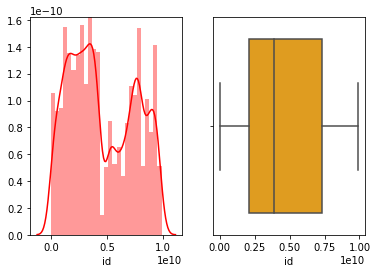

In [21]:
plt.subplot(121)
sns.distplot(df['id'], color='red')
plt.subplot(122)
sns.boxplot(df['id'], color='orange')
plt.show()

In [22]:
plt.close()

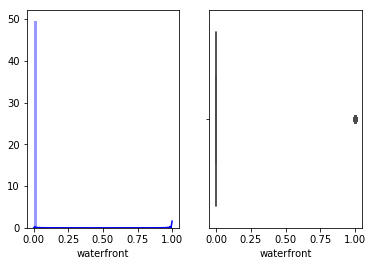

In [23]:
plt.subplot(121)
sns.distplot(df['waterfront'], color='blue')
plt.subplot(122)
sns.boxplot(df['waterfront'], color='orange')
plt.show()

In [24]:
plt.close()

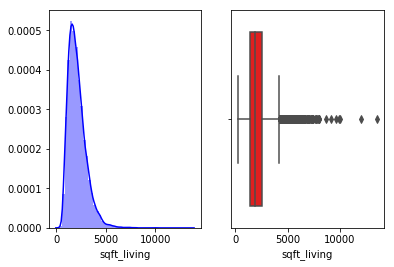

In [25]:
plt.subplot(121)
sns.distplot(df['sqft_living'], color='blue')
plt.subplot(122)
sns.boxplot(df['sqft_living'], color='red')
plt.show()

In [26]:
plt.close()

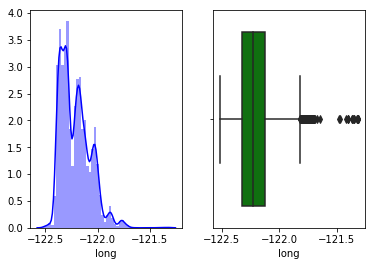

In [27]:
plt.subplot(121)
sns.distplot(df['long'], color='blue')
plt.subplot(122)
sns.boxplot(df['long'], color='green')
plt.show()

In [28]:
plt.close()

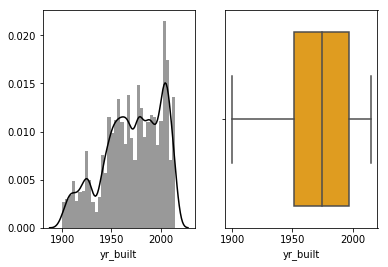

In [29]:
plt.subplot(121)
sns.distplot(df['yr_built'], color='black')
plt.subplot(122)
sns.boxplot(df['yr_built'], color='orange')
plt.show()

In [30]:
plt.close()

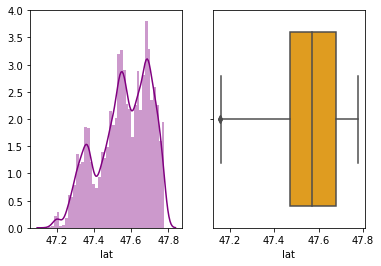

In [31]:
plt.subplot(121)
sns.distplot(df['lat'], color='purple')
plt.subplot(122)
sns.boxplot(df['lat'], color='orange')
plt.show()

In [32]:
plt.close()

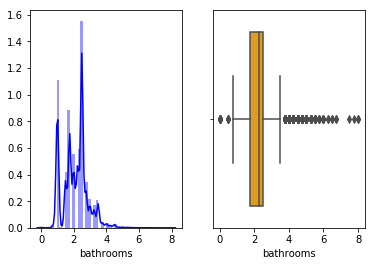

In [33]:
plt.subplot(121)
sns.distplot(df['bathrooms'], color='blue')
plt.subplot(122)
sns.boxplot(df['bathrooms'], color='orange')
plt.show()

In [34]:
plt.close()

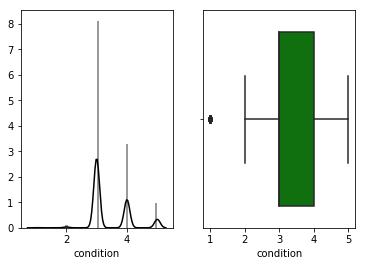

In [35]:
plt.subplot(121)
sns.distplot(df['condition'], color='black')
plt.subplot(122)
sns.boxplot(df['condition'], color='green')
plt.show()

In [36]:
plt.close()

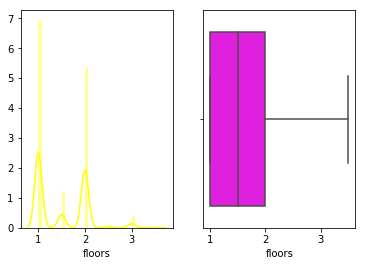

In [37]:
plt.subplot(121)
sns.distplot(df['floors'], color='yellow')
plt.subplot(122)
sns.boxplot(df['floors'], color='magenta')
plt.show()

In [38]:
plt.close()

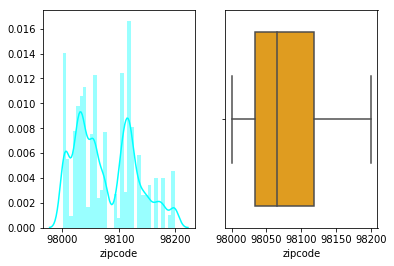

In [39]:
plt.subplot(121)
sns.distplot(df['zipcode'], color='cyan')
plt.subplot(122)
sns.boxplot(df['zipcode'], color='orange')
plt.show()

In [40]:
plt.close()

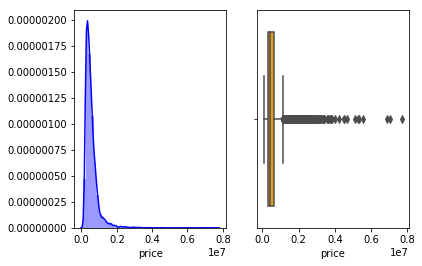

In [41]:
plt.subplot(121)
sns.distplot(df['price'], color='blue')
plt.subplot(122)
sns.boxplot(df['price'], color='orange')
plt.show()

In [42]:
plt.close()

In [43]:
#bivariate analysis
pd.crosstab(df['bathrooms'], df['bedrooms'], margins=True)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33,All
bathrooms,,,,,,,,,,,,,,
0.0,7,3,0,0,0,0,0,0,0,0,0,0,0,10
0.5,0,1,2,0,1,0,0,0,0,0,0,0,0,4
0.75,1,27,26,16,2,0,0,0,0,0,0,0,0,72
1.0,1,138,1558,1780,325,43,6,1,0,0,0,0,0,3852
1.25,0,2,3,4,0,0,0,0,0,0,0,0,0,9
1.5,1,12,294,829,254,48,6,2,0,0,0,0,0,1446
1.75,0,4,304,1870,719,134,16,0,0,0,0,0,1,3048
2.0,0,6,216,1048,525,110,24,0,0,0,1,0,0,1930
2.25,0,4,118,1082,709,116,15,3,0,0,0,0,0,2047


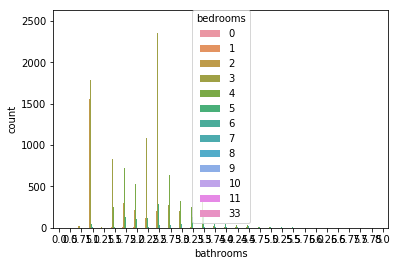

In [44]:
sns.countplot(x='bathrooms',hue='bedrooms',data=df)

In [45]:
plt.close()

In [46]:
pd.crosstab(df['view'],df['condition'],margins=True)

condition,1,2,3,4,5,All
view,,,,,,
0,27,166,12768,5054,1474,19489
1,1,1,191,105,34,332
2,0,3,588,268,104,963
3,0,2,309,153,46,510
4,2,0,175,99,43,319
All,30,172,14031,5679,1701,21613


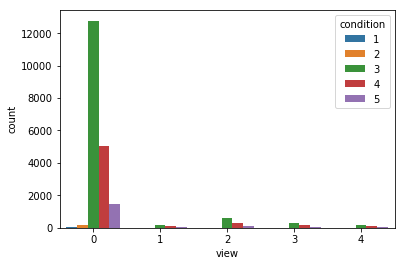

In [47]:
sns.countplot(x='view',hue='condition',data=df)

In [48]:
plt.close()

In [49]:
pd.crosstab(df['long'],df['grade'],margins=True)

grade,1,3,4,5,6,7,8,9,10,11,12,13,All
long,,,,,,,,,,,,,
-122.519,0,0,0,0,0,0,1,0,0,0,0,0,1
-122.515,0,0,0,0,0,0,0,1,0,0,0,0,1
-122.514,0,0,0,0,0,0,1,0,0,0,0,0,1
-122.512,0,0,0,1,0,0,0,0,0,0,0,0,1
-122.511,0,0,0,0,1,1,0,0,0,0,0,0,2
-122.509,0,0,0,0,0,2,0,0,0,0,0,0,2
-122.507,0,0,0,0,0,1,0,0,0,0,0,0,1
-122.506,0,0,0,0,0,1,0,0,0,0,0,0,1
-122.505,0,0,0,0,0,2,1,0,0,0,0,0,3


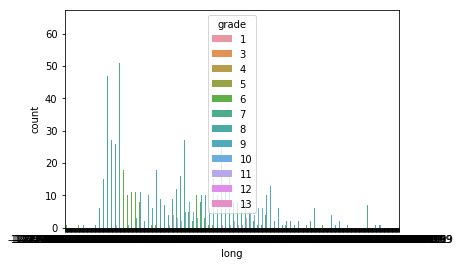

In [50]:
sns.countplot(x='long',hue='grade',data=df)

In [51]:
plt.close()
#pd.crosstab(df['condition'],df['date'],margins=True)

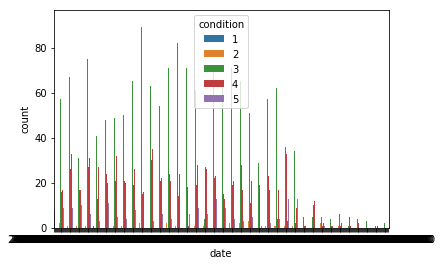

In [52]:
sns.countplot(x='date',hue='condition',data=df)

In [ ]:
plt.close()
